In [14]:
import yt
import matplotlib.pyplot  as plt
import numpy as np

In [15]:
import matplotlib as mpl

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_45565/1482973336.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [16]:
filedir = [
            '/Users/yao/Desktop/cap10eV/', # v4.8 
          ] 

filename = 'radslab_hdf5_chk_0050'  # check the mass fraction for the negative energy

In [17]:
data_yt = yt.load(filedir[0]+filename)
data_yt_map = data_yt.covering_grid(level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions)
time_now = np.array(data_yt.current_time)*1e9

yt : [INFO     ] 2025-06-20 15:45:17,534 Particle file found: radslab_hdf5_chk_0050
yt : [INFO     ] 2025-06-20 15:45:17,555 Parameters: current_time              = 2.500005796849507e-09
yt : [INFO     ] 2025-06-20 15:45:17,556 Parameters: domain_dimensions         = [2048    1    1]
yt : [INFO     ] 2025-06-20 15:45:17,556 Parameters: domain_left_edge          = [-0.04   0.    -0.004]
yt : [INFO     ] 2025-06-20 15:45:17,556 Parameters: domain_right_edge         = [0.04  0.032 0.004]
yt : [INFO     ] 2025-06-20 15:45:17,557 Parameters: cosmological_simulation   = 0


In [18]:
def get_yt_data_1d(filename):
# read the domain_left_edge info from the output above
# and fix the left_edge down there

    j_idx = 0
    k_idx = 0
    fields_list = ["x", "dens", "tele", "tion", "trad",
                   "pres", "temp", "cham", "targ", "tar2",
                   "velx", "ye", 
                #    "magz"
                   ]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[-0.04, 0.0, -0.004], dims=data_yt.domain_dimensions
    )
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        data_dict[f] = data_yt_map[f][:,j_idx,k_idx]
    return data_dict, time_now

In [19]:
def get_yt_data_2d(filename):

    k_idx = 0
    fields_list = ["dens", "tele", "tion",'trad', 'pres',
                #    "depo",
                #    "pres", "temp", "cham", "targ", 
                #    "velx", 
                   "ye"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[-0.0002, 0.0, -0.004], dims=data_yt.domain_dimensions
    ) # note here about the left_edge in x,y,z.
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        # data_dict[f] = data_yt_map[f][k_idx,:] # careful here about which axis is which
        data_dict[f] = data_yt_map[f][:,:,k_idx] # careful here about which axis is which
    return data_dict, time_now

In [20]:
data_yt.field_list

[('flash', 'absr'),
 ('flash', 'bdry'),
 ('flash', 'cham'),
 ('flash', 'cond'),
 ('flash', 'dbgs'),
 ('flash', 'dens'),
 ('flash', 'dfcf'),
 ('flash', 'eele'),
 ('flash', 'eint'),
 ('flash', 'eion'),
 ('flash', 'emis'),
 ('flash', 'ener'),
 ('flash', 'erad'),
 ('flash', 'fllm'),
 ('flash', 'gamc'),
 ('flash', 'game'),
 ('flash', 'mgdc'),
 ('flash', 'pele'),
 ('flash', 'pion'),
 ('flash', 'pipe'),
 ('flash', 'prad'),
 ('flash', 'pres'),
 ('flash', 'r001'),
 ('flash', 'r002'),
 ('flash', 'r003'),
 ('flash', 'r004'),
 ('flash', 'r005'),
 ('flash', 'r006'),
 ('flash', 'shok'),
 ('flash', 'sumy'),
 ('flash', 'tar2'),
 ('flash', 'targ'),
 ('flash', 'tele'),
 ('flash', 'temp'),
 ('flash', 'tion'),
 ('flash', 'tite'),
 ('flash', 'trad'),
 ('flash', 'velx'),
 ('flash', 'vely'),
 ('flash', 'velz'),
 ('flash', 'volx'),
 ('flash', 'voly'),
 ('flash', 'volz'),
 ('flash', 'ye')]

In [9]:
data_dict, time_now = get_yt_data_1d(filedir[0]+filename)
print(data_dict.keys())

yt : [INFO     ] 2025-06-19 21:56:07,091 Particle file found: radslab_hdf5_chk_0050


yt : [INFO     ] 2025-06-19 21:56:07,121 Parameters: current_time              = 2.500005796849507e-09
yt : [INFO     ] 2025-06-19 21:56:07,122 Parameters: domain_dimensions         = [2048    1    1]
yt : [INFO     ] 2025-06-19 21:56:07,122 Parameters: domain_left_edge          = [-0.04   0.    -0.004]
yt : [INFO     ] 2025-06-19 21:56:07,123 Parameters: domain_right_edge         = [0.04  0.032 0.004]
yt : [INFO     ] 2025-06-19 21:56:07,123 Parameters: cosmological_simulation   = 0


dict_keys(['x', 'dens', 'tele', 'tion', 'trad', 'pres', 'temp', 'cham', 'targ', 'tar2', 'velx', 'ye'])


In [10]:
xx = np.linspace(data_yt.domain_left_edge[0]*1e4, data_yt.domain_right_edge[0]*1e4,data_yt.domain_dimensions[0])

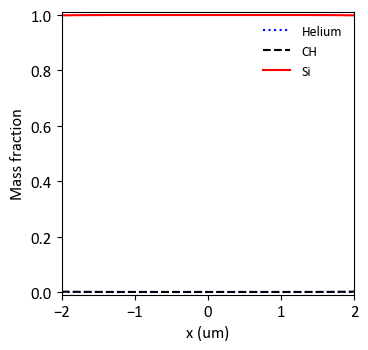

In [11]:
width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xx, data_dict['cham'],':b',label='Helium')
ax.plot(xx, data_dict['targ'],'--k',label='CH')
ax.plot(xx, data_dict['tar2'],'-r',label='Si')
ax.set_xlabel(r'x (um)')
ax.set_xlim([-2,2])
ax.set_ylabel('Mass fraction')
ax.set_ylim([-0.01,1.01])
ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=10, frameon=False)

fig.set_size_inches(width, height)


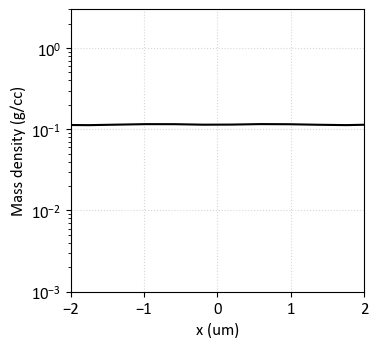

In [12]:
width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xx, data_dict['dens'],'-k',label='density')
# ax.plot(xx, data_dict['targ'],'--k',label='CH')
# ax.plot(xx, data_dict['tar2'],'-r',label='Si')
ax.set_xlabel(r'x (um)')
ax.set_xlim([-2,2])
ax.set_ylabel('Mass density (g/cc)')
ax.grid(linestyle=':', alpha=0.5)
ax.set_ylim([1e-3,3])
# ax.legend()

fig.set_size_inches(width, height)

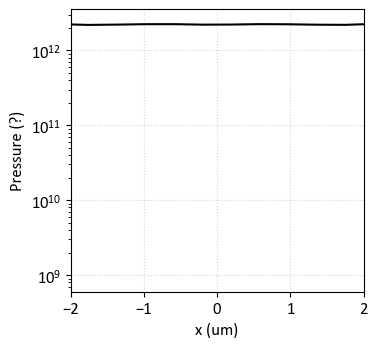

In [13]:
width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xx, data_dict['pres'],'-k')
# ax.plot(xx, data_dict['targ'],'--k',label='CH')
# ax.plot(xx, data_dict['tar2'],'-r',label='Si')
ax.set_xlabel(r'x (um)')
ax.set_xlim([-2,2])
ax.set_ylabel('Pressure (?)')
ax.grid(linestyle=':', alpha=0.5)
# ax.set_ylim([1e6,1e10])
# ax.legend()

fig.set_size_inches(width, height)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_30537/2268557412.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


TypeError: Invalid shape (2048,) for image data

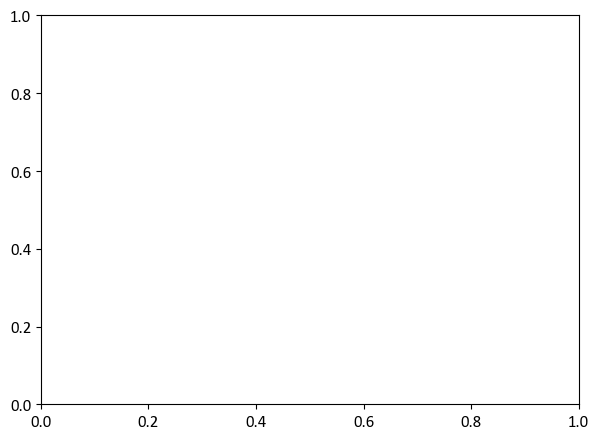

In [14]:
import matplotlib as mpl

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

# fig,ax = plt.figure(figsize=(width, height))

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
# print(data_dict['dens'].shape)
# f1 = ax.imshow(((data_dict['tele']/11600).T),
# f1 = ax.imshow((np.log10(data_dict['dens']).T),
f1 = ax.imshow((np.log10(data_dict['pres']).T),
           # cmap='magma_r',
               cmap=newcmap,
           origin='lower',
        #    extent=[0,1,0,2],
        #    vmin=-6,
        #    vmax=-2,
        #    aspect='equal',
           aspect='auto',
          )

# ax.set_xlim(0,1)
# ax.set_ylim(0,2)
# ax.set_xlabel('r (cm)')
# ax.set_ylabel('z (cm)')
ax.set_title('Time = {:.1f} ns'.format(time_now))

cbar = fig.colorbar(f1)
# cbar.ax.set_ylabel(r'Log$_{10}$ $\rho$ (g/cm$^{-3}$)')
# cbar.ax.set_ylabel(r'$T_e$ (eV)')
# cbar.minorticks_on()
cbar.cmap.set_under('white')
cbar.cmap.set_over('black')
# cbar

# Colorbar
# grid[1].cax.colorbar(im1)
# grid[1].cax.cla()
# mpl.colorbar.Colorbar(grid[1].cax,im1)
# grid[1].cax.toggle_label(True)
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
# fig.tight_layout()

fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

In [15]:
data_dict['tele'][32,16]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [21]:
time_ns = np.linspace(0,3,61)

Te_center   = np.zeros_like(time_ns)
Tr_boundary = np.zeros_like(time_ns)
rho_center  = np.zeros_like(time_ns)

filedir = [
            '/Users/yao/Desktop/cap10eV/', # v4.8 
          ] 

for i in range(time_ns.size):
    filename = 'radslab_hdf5_chk_' +str(i).zfill(4)
    data_dict, time_now = get_yt_data_1d(filedir[0]+filename)
    Te_center[i]   = data_dict['tele'][1024]
    Tr_boundary[i] = data_dict['trad'][1]
    rho_center[i]  = data_dict['dens'][1024]
    
    
    

yt : [INFO     ] 2025-06-20 15:45:30,256 Particle file found: radslab_hdf5_chk_0000


yt : [INFO     ] 2025-06-20 15:45:30,285 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-06-20 15:45:30,285 Parameters: domain_dimensions         = [2048    1    1]
yt : [INFO     ] 2025-06-20 15:45:30,286 Parameters: domain_left_edge          = [-0.04   0.    -0.004]
yt : [INFO     ] 2025-06-20 15:45:30,286 Parameters: domain_right_edge         = [0.04  0.032 0.004]
yt : [INFO     ] 2025-06-20 15:45:30,287 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-06-20 15:45:30,503 Particle file found: radslab_hdf5_chk_0001
yt : [INFO     ] 2025-06-20 15:45:30,538 Parameters: current_time              = 5.376369923749302e-11
yt : [INFO     ] 2025-06-20 15:45:30,538 Parameters: domain_dimensions         = [2048    1    1]
yt : [INFO     ] 2025-06-20 15:45:30,538 Parameters: domain_left_edge          = [-0.04   0.    -0.004]
yt : [INFO     ] 2025-06-20 15:45:30,539 Parameters: domain_right_edge         = [0.04  0.032 0.004]
yt : [INFO     ] 2025-06-20 15:45:30,53

In [22]:
time_ns = np.linspace(0,3,61)

Te_center2   = np.zeros_like(time_ns)
Tr_boundary2 = np.zeros_like(time_ns)
rho_center2  = np.zeros_like(time_ns)

filedir2 = [
            '/Users/yao/Desktop/cap1_3eV/', # v4.8 
          ] 


for i in range(time_ns.size):
    filename2 = 'radslab_hdf5_chk_' +str(i).zfill(4)
    data_dict2, time_now2 = get_yt_data_1d(filedir2[0]+filename2)
    Te_center2[i]   = data_dict2['tele'][1024]
    Tr_boundary2[i] = data_dict2['trad'][1]
    rho_center2[i]  = data_dict2['dens'][1024]

yt : [INFO     ] 2025-06-20 15:45:49,167 Particle file found: radslab_hdf5_chk_0000


yt : [INFO     ] 2025-06-20 15:45:49,192 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-06-20 15:45:49,193 Parameters: domain_dimensions         = [2048    1    1]
yt : [INFO     ] 2025-06-20 15:45:49,193 Parameters: domain_left_edge          = [-0.04   0.    -0.004]
yt : [INFO     ] 2025-06-20 15:45:49,193 Parameters: domain_right_edge         = [0.04  0.032 0.004]
yt : [INFO     ] 2025-06-20 15:45:49,194 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-06-20 15:45:49,340 Particle file found: radslab_hdf5_chk_0001
yt : [INFO     ] 2025-06-20 15:45:49,360 Parameters: current_time              = 5.376369923749302e-11
yt : [INFO     ] 2025-06-20 15:45:49,360 Parameters: domain_dimensions         = [2048    1    1]
yt : [INFO     ] 2025-06-20 15:45:49,361 Parameters: domain_left_edge          = [-0.04   0.    -0.004]
yt : [INFO     ] 2025-06-20 15:45:49,361 Parameters: domain_right_edge         = [0.04  0.032 0.004]
yt : [INFO     ] 2025-06-20 15:45:49,36

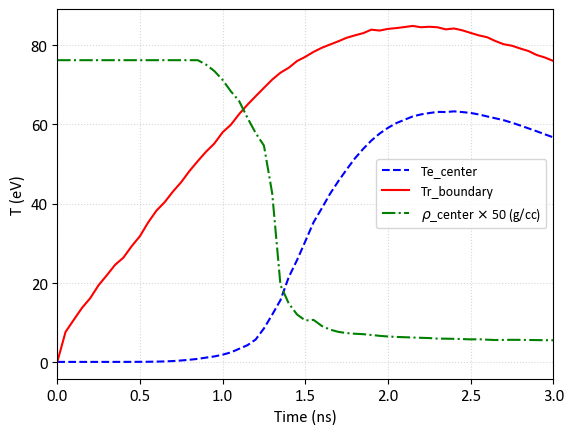

In [16]:
time_ns = np.linspace(0,3,61)

plt.plot(time_ns,Te_center/11600,   '--b', label='Te_center')
plt.plot(time_ns,Tr_boundary/11600, '-r',  label='Tr_boundary')
plt.plot(time_ns,rho_center*50,    '-.g', label=r'$\rho$_center $\times$ 50 (g/cc)')
plt.xlabel('Time (ns)')
plt.ylabel(r'T (eV)')
# plt.title('Temperatures ')
plt.xlim([0,3])
# plt.ylim([0,100])
plt.grid(linestyle=':',alpha=0.5)
plt.legend()
plt.savefig('/Users/yao/Desktop/Temp_profile_cap10eV.pdf',dpi=600)

In [69]:
np.savetxt('/Users/yao/Desktop/Tr.txt', Tr_boundary/11600)

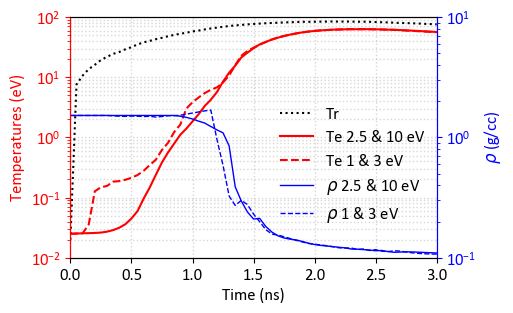

In [27]:
## Now we do the lineout of the data

width  = 3.487 * 1.5
height = width / 1.618 #* 0.8

fig, axs = plt.subplots()

time_ns = np.linspace(0,3,61)

axs.plot(time_ns, Tr_boundary/11600, ':k', label='Tr_boundary')
axs.plot(time_ns, Te_center/11600, '-r', label='Te_center 10 eV')
axs.plot(time_ns, Te_center2/11600, '--r', label='Te_center 1_3 eV')
axs.set_yscale('log')
# axs.plot(time_ns, Tr_boundary2/11600, '-k', label='Tr_boundary')



axs.set_ylabel('Temperatures (eV)', color='r')
axs.tick_params(axis='y',which='both', color='r', labelcolor='r')
axs.spines['right'].set_color('b')
axs.spines['left'].set_color('r')
axs.grid(which='both', alpha=0.5,linestyle=':', lw=1.0)
axs.set_ylim([0.01, 100])
axs.set_xlabel('Time (ns)')


ax2 = axs.twinx()
ax2.semilogy(time_ns, rho_center, '-b', label='$\rho$_center $', lw=1)
ax2.semilogy(time_ns, rho_center2, '--b', label='$\rho$_center 42 eV', lw=1)
ax2.set_ylabel(r'$\rho$ (g/cc)', color='b')
ax2.tick_params(axis='y',which='both', color='b', labelcolor='b')
ax2.set_ylim([1e-1, 10])
ax2.set_xlim([0,3])
ax2.set_xlabel('Time (ns)')
ax2.spines['right'].set_color('b')
ax2.spines['left'].set_color('r')
# ax2.set_xticks([0,1])
# ax2.invert_xaxis()

fig.legend(['Tr','Te 2.5 & 10 eV','Te 1 & 3 eV', r'$\rho$ 2.5 & 10 eV', r'$\rho$ 1 & 3 eV'], 
           bbox_to_anchor=(0.85, 0.7),
           fontsize=12, 
           fancybox=False, 
           frameon=False)


fig.set_size_inches(width, height)
fig.tight_layout()
fig.savefig('/Users/yao/Desktop/Temp_profile_log_cap10_3eV.pdf',dpi=600)

In [70]:
np.savetxt('/Users/yao/Desktop/Te.txt', Te_center/11600)

In [76]:
np.savetxt('/Users/yao/Desktop/rho.txt', rho_center)

In [25]:
data_dict['trad'][0]/11600

unyt_quantity(75.99123974, 'code_temperature')